<a href="https://colab.research.google.com/github/Cristian7B/PyIA---Redes-y-Clasificacion/blob/main/tarea1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('./TR1.csv')
regresion = pd.read_csv('./TR1.csv')

In [3]:
dataset.head()

,Unnamed: 0,Tiempo (H),Temperatura (°C)
0,0,0.00,2.00
1,1,0.06,4.24
2,2,0.12,6.41
3,3,0.18,8.52
4,4,0.24,10.56


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        100 non-null    int64  
 1   Tiempo (H)        100 non-null    float64
 2   Temperatura (°C)  100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [5]:
dataset.describe()

,Unnamed: 0,Tiempo (H),Temperatura (°C)
count,100.000000,100.000000,100.000000
mean,49.500000,3.000000,53.086900
std,29.011492,1.758553,19.655063
min,0.000000,0.000000,2.000000
25%,24.750000,1.502500,41.570000
50%,49.500000,3.000000,60.265000
75%,74.250000,4.497500,69.090000
max,99.000000,6.000000,73.270000


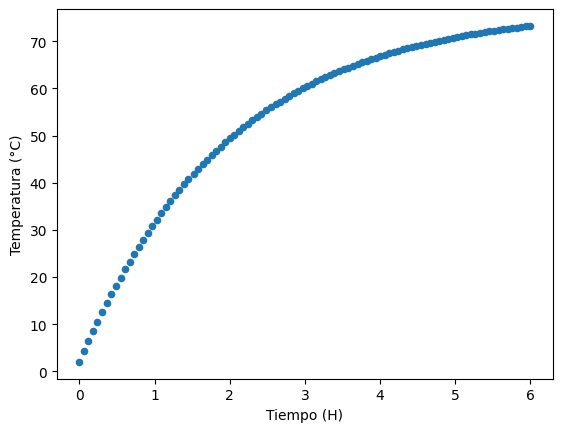

In [6]:
dataset.plot.scatter(x='Tiempo (H)',y='Temperatura (°C)')
plt.show()
t = dataset["Tiempo (H)"]
T = dataset["Temperatura (°C)"]

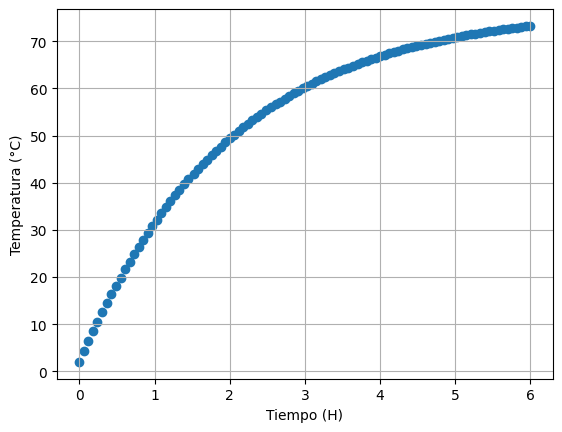

In [7]:
t=np.array(dataset["Tiempo (H)"])
T=np.array(dataset["Temperatura (°C)"])

plt.ylabel("Temperatura (°C)")
plt.xlabel("Tiempo (H)")
plt.grid()
plt.scatter(t,T)

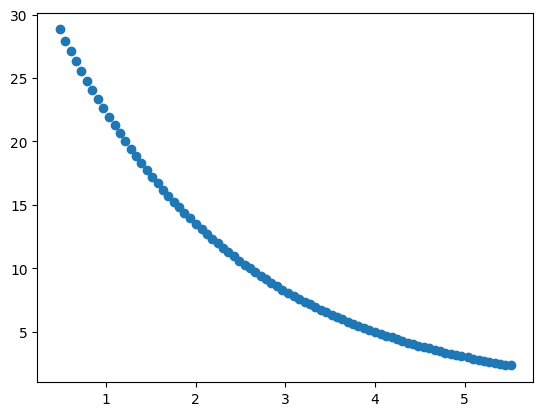

In [221]:
Tp=np.array([T[i+16]-T[i] for i in range(len(t)-16)])
tp=np.array([(t[i]+t[i+16])/2 for i in range(len(t)-16)])
plt.scatter(tp,Tp)


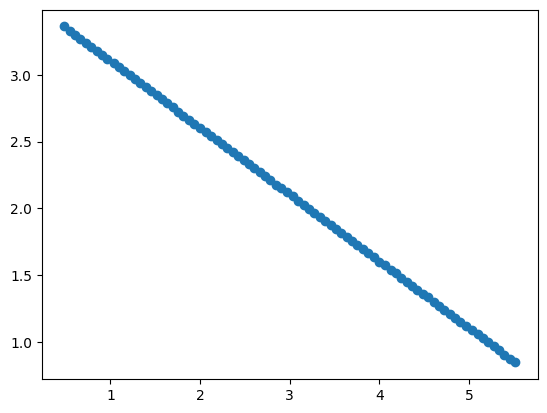

In [222]:

Y=np.log(Tp)
plt.scatter(tp,Y)

In [223]:

X=np.array([np.ones(len(tp)),tp])
print(X)
B1=Y@X.T@np.linalg.inv(X@X.T)
print(B1)
print("ln(AB)=",B1[0],"->AB=",np.exp(B1[0]))
A=np.exp(B1[0])/B1[1]
B=B1[1]
print("B=",B)
print("A=",A)



[[1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
  1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
  1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
  1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
  1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
  1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
  1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.   ]
 [0.485 0.545 0.605 0.665 0.725 0.785 0.845 0.905 0.965 1.035 1.095 1.155
  1.215 1.275 1.335 1.395 1.455 1.515 1.575 1.635 1.695 1.755 1.815 1.875
  1.935 2.    2.065 2.125 2.185 2.245 2.305 2.365 2.425 2.485 2.545 2.605
  2.665 2.725 2.785 2.845 2.905 2.965 3.035 3.095 3.155 3.215 3.275 3.335
  3.395 3.455 3.515 3.575 3.635 3.695 3.755 3.815 3.875 3.935 4.    4.065
  4.125 4.185 4.245 4.305 4.365 4.425 4.485 4.545 4.605 4.665 4.725 4.785
  4.845 4.905 4.965 5.035 5.095 5.155 5.215 5.275 5.335

Text(0.5, 0, 'Tiempo (H)')

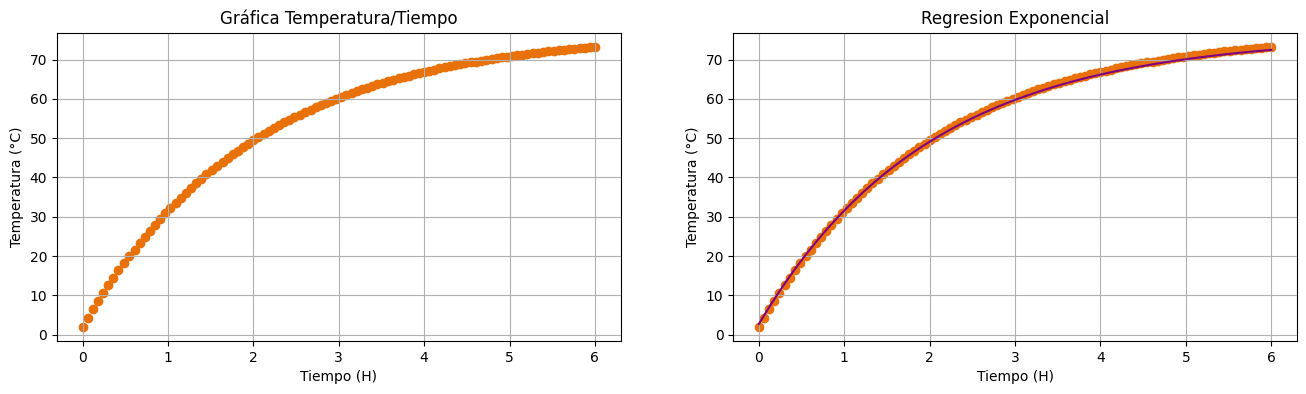

In [241]:
f=lambda  t: A*np.exp(B*t)+T[-16]

plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
plt.scatter(t,T,color="#E8710A")
plt.title("Gráfica Temperatura/Tiempo")
plt.ylabel("Temperatura (°C)")
plt.xlabel("Tiempo (H)")
plt.grid()


plt.subplot(1,2,2)
plt.scatter(t,T,color="#E8710A")
plt.grid()
plt.plot(t,f(t)+5, color="purple")
plt.title("Regresion Exponencial")
plt.ylabel("Temperatura (°C)")
plt.xlabel("Tiempo (H)")
